# Project 2 (Group Project) US Vaccination Insight

### Steps: 
- Data Cleaning
- Date analysis
- Graphing
- Conclusion


### Import dataset

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline
d = lambda x: datetime.strptime(x, '%Y-%m-%d')

# all States in U.S
states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", 
          "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", 
          "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", 
          "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", 
          "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", 
          "Wisconsin", "Wyoming"]

# Load the data
## Main dataset: time_series_covid19_vaccine_doses_admin_US.csv & vaccine_data_us_timeline.csv
vus_doses = pd.read_csv('https://raw.githubusercontent.com/UC-Berkeley-I-School/Project2_Zhou_Tung_Iradukunda/main/time_series_covid19_vaccine_doses_admin_US.csv?token=GHSAT0AAAAAABQCEFTB55K7G5D3MUNO4THCYSYTSWA', index_col=False)
vus_type = pd.read_csv('https://raw.githubusercontent.com/UC-Berkeley-I-School/Project2_Zhou_Tung_Iradukunda/main/vaccine_data_us_timeline.csv?token=GHSAT0AAAAAABQCEFTAMLJKJGSBOHXPRSS4YSYTRUQ', index_col=False, parse_dates=['Date'], date_parser=d)


### Date Clean up

In [2]:
#change column names to all lower case
vus_doses = vus_doses.rename(columns = str.lower)
vus_type.columns= vus_type.columns.str.lower()

# remove unnecessary columns
vus_doses = vus_doses.drop(columns = ['uid', 'iso2', 'iso3', 'code3', 'admin2', 'lat', 'long_', 'combined_key'])
vus_type = vus_type.drop(columns = ['lat', 'long_', 'combined_key'])

# remove any rows with value in province_state that is not a U.S state
vus_doses = vus_doses[vus_doses['province_state'].isin(states)]
vus_type = vus_type[vus_type['province_state'].isin(states)]

# Convert dates in column into a column name 'date' for dataset vus_doses
vus_doses = vus_doses.melt(id_vars = ['fips', 'province_state', 'country_region', 'population'], 
              var_name = 'date', 
              value_name = 'total_doses').sort_values(by = ['province_state'])

# Only keep data in range 2021-03-31 - 2022-04-01
vus_doses = vus_doses[(vus_doses. date > '2021-03-31') & (vus_doses.date < '2022-04-01')]

vus_type = vus_type[(vus_type.date > '2021-03-31') & (vus_type.date < '2022-04-01')]


In [ ]:
print(vus_doses.columns)
print(vus_type.columns)

- Drop unnecessary columns: Lautitude, Longtitude, Combined key for province and country region, 
- Time period: We only used data from time period April 1st 2021 to March 31 2022. Dataset start recording data from December 10th of 2020. But doses shipped and administered data were not available until January 15th, 2021. In addition, Janssen vaccination was not available until the end of February. Therefore, we decided to use the data from the 2nd quarter of 2021 until fist quarter of 2022
- Remove any states that are not in the fifty states of the U.S. from the dataframe. List of items in State column are not U.S States: 
    - American Samoa
    - Bureau of Prisons
    - Department of Defense
    - District of Columbia
    - Federal Bureau of Prisons
    - Federated States of Micronesia
    - Guam
    - Indian Health Services
    - Long Term Care (LTC) Program
    - Marshall Islands
    - Northern Mariana Islands
    - Puerto Rico
    - Republic of Palau
    - Veterans Health Administration
    - Virgin Islands
- Change all columns names to lower case
- 'Unpivot' the date columns to column 'date' and amount to 'value' column


### Data insight for Doses distribution

In [3]:
total_ship_admin = vus_type[(vus_type.date == "2022-03-31") & (vus_type.vaccine_type == "All")].set_index("province_state")
total_ship_admin['perc_admin'] = total_ship_admin['doses_admin']/total_ship_admin['doses_shipped']*100
#total_ship_admin[['doses_shipped', 'doses_admin', 'perc_admin']].sort_values(by = ['doses_shipped'], ascending=False)


In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))
p1 = ax.bar(total_ship_admin.index, total_ship_admin.perc_admin)

plt.xticks(rotation = 90)
ax.set_xlabel('States')
ax.set_ylabel('Percentage of Doses Administered over Doses Shipped to States')
ax.set_title('Rate of Vaccination Usage', fontsize=15)


In [ ]:
#drop Hawaii
#total_ship_admin = total_ship_admin.drop(['Hawaii'], axis = 0).sort_values(by = 'perc_admin')

fig, ax = plt.subplots(figsize = (15, 10))
p1 = ax.bar(total_ship_admin.index, total_ship_admin.perc_admin)

plt.xticks(rotation = 90)
ax.set_xlabel('States', fontsize=15)
ax.set_ylabel('Percentage', fontsize=15)
ax.set_title('Rate of Doses Administered over Doses Shipped to Site', fontsize=15)


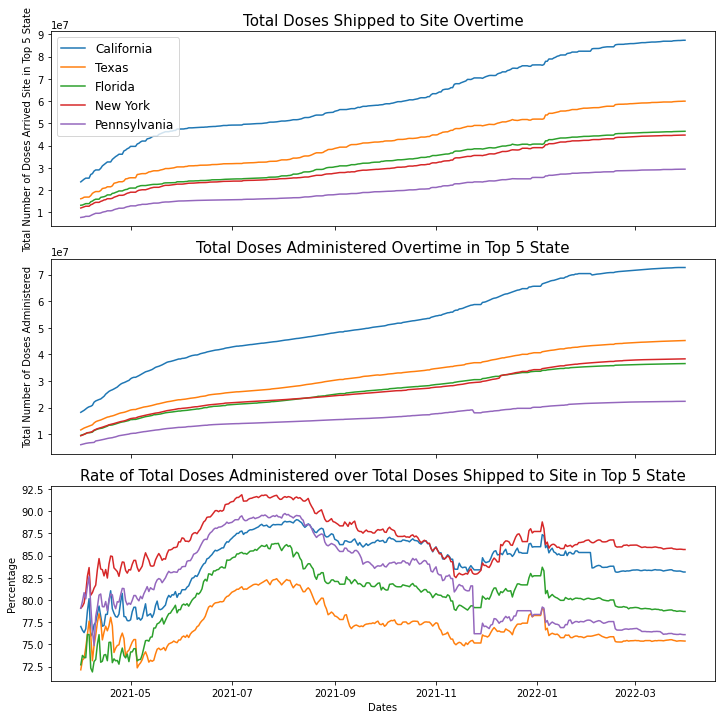

In [8]:
top5_states = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania']
top5_ship_admin = vus_type[(vus_type.province_state.isin(top5_states)) & (vus_type.vaccine_type == "All")].set_index('date')
top5_ship_admin['perc_admin'] = (top5_ship_admin['doses_admin']/top5_ship_admin['doses_shipped']) *100

ca_ship_admin = top5_ship_admin[(top5_ship_admin.province_state == "California")]
tx_ship_admin = top5_ship_admin[(top5_ship_admin.province_state == "Texas")]
fl_ship_admin = top5_ship_admin[(top5_ship_admin.province_state == "Florida")]
ny_ship_admin = top5_ship_admin[(top5_ship_admin.province_state == "New York")]
pa_ship_admin = top5_ship_admin[(top5_ship_admin.province_state == "Pennsylvania")]


fig, ax = plt.subplots(3, 1, figsize = (10, 10), sharex = True)

p_ca = ax[0].plot(ca_ship_admin.doses_shipped, label = 'California')
p_tx = ax[0].plot(tx_ship_admin.doses_shipped, label = 'Texas')
p_fl = ax[0].plot(fl_ship_admin.doses_shipped, label = 'Florida')
p_ny = ax[0].plot(ny_ship_admin.doses_shipped, label = 'New York')
p_pa = ax[0].plot(pa_ship_admin.doses_shipped, label = 'Pennsylvania')


p_ca = ax[1].plot(ca_ship_admin.doses_admin, label = 'California')
p_tx = ax[1].plot(tx_ship_admin.doses_admin, label = 'Texas')
p_fl = ax[1].plot(fl_ship_admin.doses_admin, label = 'Florida')
p_ny = ax[1].plot(ny_ship_admin.doses_admin, label = 'New York')
p_pa = ax[1].plot(pa_ship_admin.doses_admin, label = 'Pennsylvania')


p_ca = ax[2].plot(ca_ship_admin.perc_admin, label = 'California')
p_tx = ax[2].plot(tx_ship_admin.perc_admin, label = 'Texas')
p_fl = ax[2].plot(fl_ship_admin.perc_admin, label = 'Florida')
p_ny = ax[2].plot(ny_ship_admin.perc_admin, label = 'New York')
p_pa = ax[2].plot(pa_ship_admin.perc_admin, label = 'Pennsylvania')



ax[0].legend(fontsize=12)
ax[0].set_ylabel('Total Number of Doses Arrived Site in Top 5 State')
ax[0].set_title('Total Doses Shipped to Site Overtime', fontsize=15)

ax[1].set_ylabel('Total Number of Doses Administered')
ax[1].set_title('Total Doses Administered Overtime in Top 5 State', fontsize=15)


ax[2].set_ylabel('Percentage')
ax[2].set_title('Rate of Total Doses Administered over Total Doses Shipped to Site in Top 5 State', fontsize=15)
ax[2].set_xlabel('Dates')

plt.tight_layout()

In [4]:
state_population = vus_doses.groupby(['province_state']).agg({'population': 'first'})

In [6]:
total_vac_popu = state_population.merge(total_ship_admin, how='inner', on='province_state')
total_vac_popu['perc_ship'] = (total_vac_popu.doses_shipped) / (total_vac_popu.population) *100
total_vac_popu['perc_vac1'] = (total_vac_popu.stage_one_doses) / (total_vac_popu.population) *100
total_vac_popu['perc_vac2'] = (total_vac_popu.stage_two_doses) / (total_vac_popu.population) *100

#total_vac_popu[['population', 'doses_shipped', 'perc_admin', 'perc_ship', 'perc_vac1', 'perc_vac2']]

Text(0.5, 1.0, 'Rate of Doses Supply over Total Population')

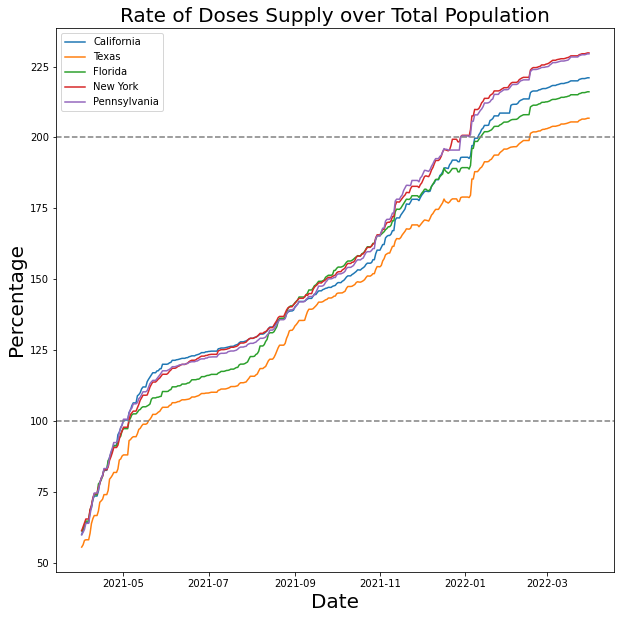

In [9]:
top5_states = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania']
top5_ship_v1v2 = vus_type[(vus_type.province_state.isin(top5_states)) & (vus_type.vaccine_type == "All")]
top5_ship_v1v2 = state_population[state_population.index.isin(top5_states)].merge(top5_ship_v1v2, how='inner', on='province_state').set_index('date')
top5_ship_v1v2['perc_ship'] = (top5_ship_v1v2.doses_shipped/top5_ship_v1v2.population) *100
top5_ship_v1v2['perc_v1'] = (top5_ship_v1v2.stage_one_doses/top5_ship_v1v2.population) *100
top5_ship_v1v2['perc_v2'] = (top5_ship_v1v2.stage_two_doses/top5_ship_v1v2.population) *100


ca_ship_v1v2 = top5_ship_v1v2[(top5_ship_v1v2.province_state == "California")]
tx_ship_v1v2 = top5_ship_v1v2[(top5_ship_v1v2.province_state == "Texas")]
fl_ship_v1v2 = top5_ship_v1v2[(top5_ship_v1v2.province_state == "Florida")]
ny_ship_v1v2 = top5_ship_v1v2[(top5_ship_v1v2.province_state == "New York")]
pa_ship_v1v2 = top5_ship_v1v2[(top5_ship_v1v2.province_state == "Pennsylvania")]


fig, ax = plt.subplots(1, 1, figsize = (10, 10))
p_ca = ax.plot(ca_ship_v1v2.perc_ship, label = 'California')
p_tx = ax.plot(tx_ship_v1v2.perc_ship, label = 'Texas')
p_fl = ax.plot(fl_ship_v1v2.perc_ship, label = 'Florida')
p_ny = ax.plot(ny_ship_v1v2.perc_ship, label = 'New York')
p_pa = ax.plot(pa_ship_v1v2.perc_ship, label = 'Pennsylvania')

ax.legend()
ax.axhline(y=100, color='grey', linestyle = "--")
ax.axhline(y=200, color='grey', linestyle = "--")

ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Percentage', fontsize=20)
ax.set_title('Rate of Doses Supply over Total Population', fontsize=20)




Text(0.5, 1.0, 'First Doses Vaccination Rate')

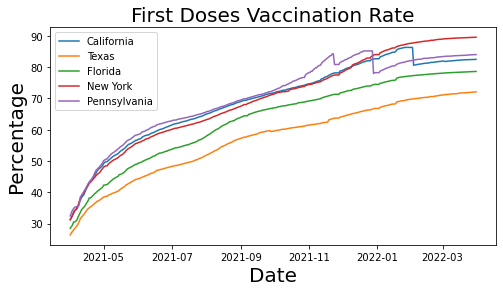

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (8, 4))
p_ca = ax.plot(ca_ship_v1v2.perc_v1, label = 'California')
p_tx = ax.plot(tx_ship_v1v2.perc_v1, label = 'Texas')
p_fl = ax.plot(fl_ship_v1v2.perc_v1, label = 'Florida')
p_ny = ax.plot(ny_ship_v1v2.perc_v1, label = 'New York')
p_pa = ax.plot(pa_ship_v1v2.perc_v1, label = 'Pennsylvania')
ax.legend()

ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Percentage', fontsize=20)
ax.set_title('First Doses Vaccination Rate', fontsize=20)


Text(0.5, 1.0, 'Second Doses Vaccination Rate')

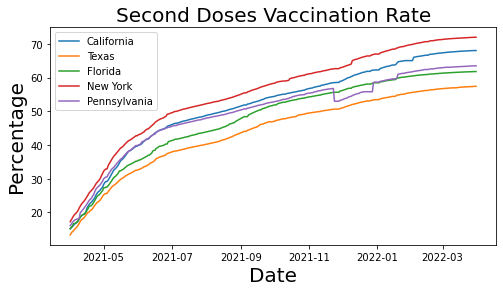

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (8, 4))
p_ca = ax.plot(ca_ship_v1v2.perc_v2, label = 'California')
p_tx = ax.plot(tx_ship_v1v2.perc_v2, label = 'Texas')
p_fl = ax.plot(fl_ship_v1v2.perc_v2, label = 'Florida')
p_ny = ax.plot(ny_ship_v1v2.perc_v2, label = 'New York')
p_pa = ax.plot(pa_ship_v1v2.perc_v2, label = 'Pennsylvania')
ax.legend()
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Percentage', fontsize=20)
ax.set_title('Second Doses Vaccination Rate', fontsize=20)